# Predicting Flight Delays with sklearn

In this notebook, we will be using features we've prepared in PySpark to predict flight delays via regression and classification.

In [1]:
import sys, os, re
sys.path.append("lib")
import utils

import numpy as np
import sklearn
print("Imports worked...")

Imports worked...


In [2]:
# Load our training data using our json utils. May take a few minutes to load.
training_data = utils.read_json_lines_file('../data/simple_flight_delay_features.jsonl')
print("Training items: {}".format(len(training_data))) # 5,714,008
print("Data loaded...")

Training items: 5714008
Data loaded...


In [3]:
# Inspect a record before we alter them
print(training_data[0])

{'FlightDate': '2015-01-01', 'Dest': 'DFW', 'FlightNum': '1024', 'ArrDelay': 13.0, 'DepDelay': 14.0, 'Origin': 'ABQ', 'Carrier': 'AA', 'DayOfYear': '1-1', 'Distance': 569.0}


In [4]:
# Sample down our training data at first...
sampled_training_data = np.random.choice(training_data, 10000) # 'Sample down to 500K examples'
print("Data sampled...")

Data sampled...


In [5]:
# Separate our results from the rest of the data, vectorize and size up
results = [record['DepDelay'] for record in sampled_training_data]
results_vector = np.array(results)
sys.getsizeof(results_vector) # 4,000,096 bytes
print("Results vectorized...")

Results vectorized...


In [6]:
# Remove the two delay fields and the flight date from our training data
for item in sampled_training_data:
  item.pop('DepDelay', None)
  item.pop('ArrDelay', None)
  item.pop('FlightDate', None)

# Use DictVectorizer to convert feature dicts to vectors
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
training_vectors = vectorizer.fit_transform(sampled_training_data)
training_vectors.data.nbytes # 16,000,000

print("Training data vectorized...")

Training data vectorized...


In [7]:
# Train a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#regressor = GradientBoostingRegressor()
regressor = LinearRegression()
# regressor.fit(training_vectors, results_vector)  # make sure you int() on the number string results
# print("Regression fit...")

In [8]:
# Get the accuracy through cross validation
# scores = sklearn.cross_validation.cross_val_score(
#   regressor,
#   training_vectors.toarray(),
#   results_vector,
#   cv=5
# )
# print(scores.mean())


In [9]:
# Try that again, with our own splits
from sklearn.cross_validation import train_test_split, cross_val_predict
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

X_train, X_test, y_train, y_test = train_test_split(
  training_vectors.toarray(),
  results_vector,
  test_size=0.10,
  random_state=43
)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

evs = explained_variance_score(y_test, predicted)
print("Explained variance score: {}".format(evs))

mae = mean_absolute_error(y_test, predicted)
print("Mean absolute error:      {}".format(mae))

medae = median_absolute_error(y_test, predicted)
print("Median absolute error:    {}".format(medae))

r2 = r2_score(y_test, predicted)
print("r2 score:                 {}".format(r2))

Explained variance score: -0.9482642945069135
Mean absolute error:      27.72797857788235
Median absolute error:    16.816154413947064
r2 score:                 -0.9482647098203028


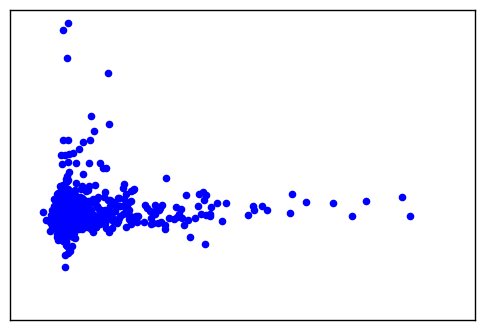

In [10]:
# Plot outputs, see how they fit
import matplotlib.pyplot as plt

#plt.scatter(X_test, y_test,  color='black')
plt.scatter(
  y_test,
  regressor.predict(X_test),
  color='blue',
  linewidth=1
)

plt.xticks(())
plt.yticks(())

plt.show()

### Now, how would we employ our model in practice to produce predictions?

